# Poem Classification unsing NLP

Dataset is classified in 4 poem genres :Affection,Environment,Music and Death

> importing required libraries

In [ ]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')

> Importing data


In [ ]:
train=pd.read_csv("/content/Poem_classification - train_data.csv",encoding="ISO-8859-1")
test=pd.read_csv("/content/Poem_classification - test_data.csv",encoding="ISO-8859-1")
df=pd.concat([train,test],axis=0,ignore_index=True)
df

,Genre,Poem
0,Music,NaN
1,Music,Â Â Â Â Â Â Â In the thick brushthey sp...
2,Music,Â Â Storms are generous.Â Â Â Â Â Â Â ...
3,Music,âAfter Ana Mendieta Did you carry around th...
4,Music,for Aja Sherrard at 20The portent may itself ...
...,...,...
986,Environment,"To pick a tulip from the garden, the red one. ..."
987,Environment,We are as clouds that veil the midnight moon; ...
988,Environment,"When pulled, the spider web took another form...."
989,Environment,Whose woods these are I think I know. His hous...


In [ ]:
df.head()

,Genre,Poem
0,Music,NaN
1,Music,Â Â Â Â Â Â Â In the thick brushthey sp...
2,Music,Â Â Storms are generous.Â Â Â Â Â Â Â ...
3,Music,âAfter Ana Mendieta Did you carry around th...
4,Music,for Aja Sherrard at 20The portent may itself ...


In [ ]:
df.tail()

,Genre,Poem
986,Environment,"To pick a tulip from the garden, the red one. ..."
987,Environment,We are as clouds that veil the midnight moon; ...
988,Environment,"When pulled, the spider web took another form...."
989,Environment,Whose woods these are I think I know. His hous...
990,Environment,you can make the maples blazejust by stopping ...


In [ ]:
df.columns

Index(['Genre', 'Poem'], dtype='object')

In [ ]:
df.isna().sum()

Genre    0
Poem     4
dtype: int64

> we may drop the missing rows.

In [ ]:
df.dropna(axis=0,inplace=True)
df.isna().sum()

Genre    0
Poem     0
dtype: int64

> finding value counts of poem genres

In [ ]:
df.reset_index(drop=True,inplace=True)
df

,Genre,Poem
0,Music,Â Â Â Â Â Â Â In the thick brushthey sp...
1,Music,Â Â Storms are generous.Â Â Â Â Â Â Â ...
2,Music,âAfter Ana Mendieta Did you carry around th...
3,Music,for Aja Sherrard at 20The portent may itself ...
4,Music,"for Bob Marley, Bavaria, November 1980 Here i..."
...,...,...
982,Environment,"To pick a tulip from the garden, the red one. ..."
983,Environment,We are as clouds that veil the midnight moon; ...
984,Environment,"When pulled, the spider web took another form...."
985,Environment,Whose woods these are I think I know. His hous...


Environment    252
Music          250
Death          244
Affection      241
Name: Genre, dtype: int64


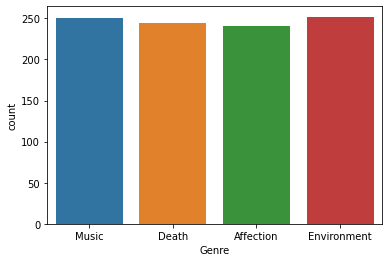

In [ ]:
genre=df['Genre'].value_counts()
print(genre)
sns.countplot('Genre',data=df)

> giving numerival values to each genre

In [ ]:
df['Genre']=df['Genre'].map({'Environment':1,'Music':2,'Death':3,'Affection':4})
df

,Genre,Poem
0,2,Â Â Â Â Â Â Â In the thick brushthey sp...
1,2,Â Â Storms are generous.Â Â Â Â Â Â Â ...
2,2,âAfter Ana Mendieta Did you carry around th...
3,2,for Aja Sherrard at 20The portent may itself ...
4,2,"for Bob Marley, Bavaria, November 1980 Here i..."
...,...,...
982,1,"To pick a tulip from the garden, the red one. ..."
983,1,We are as clouds that veil the midnight moon; ...
984,1,"When pulled, the spider web took another form...."
985,1,Whose woods these are I think I know. His hous...


> download required packages from nltk

In [ ]:
nltk.download('wordnet')            #for lemmatization
nltk.download('stopwords')          #to get stop words
nltk.download('punkt')              #for tokenization

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

> creating an object for 'Poem' column to preprocess it using NLP

In [ ]:
poems=df['Poem']
poems

0      Â  Â  Â  Â  Â  Â  Â  In the thick brushthey sp...
1      Â  Â Storms are generous.Â  Â  Â  Â  Â  Â  Â  ...
2       âAfter Ana Mendieta Did you carry around th...
3       for Aja Sherrard at 20The portent may itself ...
4       for Bob Marley, Bavaria, November 1980 Here i...
                             ...                        
982    To pick a tulip from the garden, the red one. ...
983    We are as clouds that veil the midnight moon; ...
984    When pulled, the spider web took another form....
985    Whose woods these are I think I know. His hous...
986    you can make the maples blazejust by stopping ...
Name: Poem, Length: 987, dtype: object

> Tokenization using TweetTokenizer

In [ ]:
from nltk import TweetTokenizer
tk=TweetTokenizer()
poems=poems.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
poems

0      Â Â Â Â Â Â Â In the thick brushthey spend the...
1      Â Â Storms are generous . Â Â Â Â Â Â Â Â Â Â ...
2      â   After Ana Mendieta Did you carry around ...
3      for Aja Sherrard at 20The portent may itself b...
4      for Bob Marley , Bavaria , November 1980 Here ...
                             ...                        
982    To pick a tulip from the garden , the red one ...
983    We are as clouds that veil the midnight moon ;...
984    When pulled , the spider web took another form...
985    Whose woods these are I think I know . His hou...
986    you can make the maples blazejust by stopping ...
Name: Poem, Length: 987, dtype: object

> removing charcters

In [ ]:
poems=poems.str.replace('[^a-zA-Z0-9]+',' ')
poems

0       In the thick brushthey spend the hottest part...
1       Storms are generous Something so easy to surr...
2       After Ana Mendieta Did you carry around the m...
3      for Aja Sherrard at 20The portent may itself b...
4      for Bob Marley Bavaria November 1980 Here is t...
                             ...                        
982    To pick a tulip from the garden the red one To...
983    We are as clouds that veil the midnight moon H...
984    When pulled the spider web took another form T...
985    Whose woods these are I think I know His house...
986    you can make the maples blazejust by stopping ...
Name: Poem, Length: 987, dtype: object

> next we tokenize words of length more than 3 to get a meaningful word using word_tokenize

In [ ]:
from nltk import word_tokenize
poems=poems.apply(lambda x:' '.join(w for w in word_tokenize(x) if len(w)>=3))
poems

0      the thick brushthey spend the hottest part the...
1      Storms are generous Something easy surrender s...
2      After Ana Mendieta Did you carry around the ma...
3      for Aja Sherrard 20The portent may itself memo...
4      for Bob Marley Bavaria November 1980 Here the ...
                             ...                        
982    pick tulip from the garden the red one put the...
983    are clouds that veil the midnight moon How res...
984    When pulled the spider web took another form T...
985    Whose woods these are think know His house the...
986    you can make the maples blazejust stopping loo...
Name: Poem, Length: 987, dtype: object

> lemmatization using SnowballStemmer and coverting into lowercase



In [ ]:
from nltk import SnowballStemmer
sb=SnowballStemmer('english')
poems=poems.apply(lambda x:[sb.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
poems

0      the thick brushthey spend the hottest part the...
1      storm are generous someth easi surrend sit the...
2      after ana mendieta did you carri around the ma...
3      for aja sherrard 20the portent may itself memo...
4      for bob marley bavaria novemb 1980 here the br...
                             ...                        
982    pick tulip from the garden the red one put the...
983    are cloud that veil the midnight moon how rest...
984    when pull the spider web took anoth form the b...
985    whose wood these are think know his hous the v...
986    you can make the mapl blazejust stop look you ...
Name: Poem, Length: 987, dtype: object

> removing stop words

In [ ]:
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
poems=poems.apply(lambda x:[i for i in tk.tokenize(x) if i not in stop_words]).apply(lambda x:" ".join(x))
poems

0      thick brushthey spend hottest part day soak ho...
1      storm generous someth easi surrend sit window ...
2      ana mendieta carri around matin star hold fore...
3      aja sherrard 20the portent may memori wallac s...
4      bob marley bavaria novemb 1980 brilliant morn ...
                             ...                        
982    pick tulip garden red one put desk small blue ...
983    cloud veil midnight moon restless speed gleam ...
984    pull spider web took anoth form bull eye relax...
985             whose wood think know hous villag though
986    make mapl blazejust stop look set clock barkso...
Name: Poem, Length: 987, dtype: object

> vectorization using TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data=vec.fit_transform(poems)
print(train_data)

  (0, 4220)	0.30146689607718635
  (0, 539)	0.30146689607718635
  (0, 2938)	0.30146689607718635
  (0, 4827)	0.28449588533836073
  (0, 6784)	0.15981099929334805
  (0, 3975)	0.19575085026029168
  (0, 6417)	0.25548375085469155
  (0, 2971)	0.30146689607718635
  (0, 5577)	0.2631149404105736
  (0, 1557)	0.13731010360255008
  (0, 4370)	0.2144304926261788
  (0, 2986)	0.28449588533836073
  (0, 5679)	0.2631149404105736
  (0, 834)	0.30146689607718635
  (0, 6184)	0.22647161637102237
  (1, 716)	0.352379822465326
  (1, 2503)	0.27234897303169536
  (1, 5796)	0.2828744064962698
  (1, 6920)	0.24894145012192798
  (1, 5461)	0.28005774764516433
  (1, 5995)	0.3923952471821413
  (1, 1894)	0.3228898312130851
  (1, 5611)	0.2773721445933574
  (1, 2529)	0.3923952471821413
  (1, 5846)	0.3034652705549318
  :	:
  (985, 3352)	0.30465358123002245
  (986, 617)	0.23869569629989867
  (986, 469)	0.23869569629989867
  (986, 5360)	0.23869569629989867
  (986, 3191)	0.23869569629989867
  (986, 2643)	0.23869569629989867
  (986

> model creation


> defing a and y values

In [ ]:
x=train_data
y=df['Genre'].values

> splitting into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

> importing various classifiers,creating models and comparing accuracy of each model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

knn=KNeighborsClassifier(n_neighbors=5)
nb=MultinomialNB()
svc=SVC()
tree=DecisionTreeClassifier(criterion='entropy')
forest=RandomForestClassifier(n_estimators=10,criterion='entropy')

model_lst=[knn,nb,svc,tree,forest]

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
for i in model_lst:
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("**************************************************************************")
  print(classification_report(y_test,y_pred))
  print("**************************************************************************")



KNeighborsClassifier()
**************************************************************************
              precision    recall  f1-score   support

           1       0.35      0.64      0.45        70
           2       0.36      0.32      0.34        69
           3       0.31      0.14      0.20        83
           4       0.31      0.28      0.30        75

    accuracy                           0.34       297
   macro avg       0.33      0.35      0.32       297
weighted avg       0.33      0.34      0.31       297

**************************************************************************
MultinomialNB()
**************************************************************************
              precision    recall  f1-score   support

           1       0.43      0.69      0.53        70
           2       0.33      0.42      0.37        69
           3       0.47      0.18      0.26        83
           4       0.35      0.31      0.33        75

    accuracy                 

> MultinomialNb gives maximum accuracy

> now we may use hyperparameter tuning to increase accuracy

In [ ]:
params={'alpha':[0.01,0.1,1.0,10.0,100.0],'fit_prior':[True, False]}
clf=GridSearchCV(nb,params,cv=10,scoring='accuracy')
clf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
                         'fit_prior': [True, False]},
             scoring='accuracy')

In [ ]:
print(clf.best_params_)

{'alpha': 100.0, 'fit_prior': False}


In [ ]:
nb1=MultinomialNB(alpha=100.0,fit_prior=False)
nb1.fit(x_train,y_train)
y_pred1=nb1.predict(x_test)
y_pred1

array([2, 4, 4, 4, 4, 1, 4, 2, 4, 4, 4, 1, 3, 1, 2, 2, 4, 3, 1, 2, 1, 2,
       1, 4, 4, 2, 4, 1, 4, 4, 1, 2, 1, 2, 4, 3, 4, 1, 4, 4, 3, 2, 3, 3,
       2, 4, 4, 2, 3, 1, 3, 1, 2, 1, 4, 4, 2, 4, 4, 4, 1, 4, 3, 1, 4, 4,
       3, 4, 4, 3, 3, 2, 1, 2, 4, 1, 1, 3, 4, 1, 4, 2, 3, 1, 1, 1, 1, 1,
       4, 2, 3, 3, 1, 1, 1, 2, 4, 3, 3, 2, 1, 3, 2, 4, 2, 4, 2, 4, 3, 3,
       4, 4, 2, 1, 2, 4, 3, 4, 3, 1, 2, 2, 4, 1, 2, 4, 4, 4, 4, 2, 1, 1,
       4, 1, 1, 1, 1, 4, 4, 1, 3, 1, 4, 4, 4, 1, 2, 2, 1, 2, 3, 2, 1, 2,
       1, 3, 1, 1, 4, 3, 3, 2, 4, 1, 3, 1, 2, 1, 2, 4, 1, 1, 4, 2, 1, 3,
       1, 4, 1, 3, 1, 4, 1, 1, 1, 1, 4, 4, 4, 1, 1, 4, 4, 1, 1, 2, 4, 4,
       3, 1, 1, 1, 1, 1, 4, 3, 2, 4, 1, 4, 4, 2, 1, 4, 1, 4, 4, 3, 3, 2,
       1, 2, 1, 4, 1, 2, 3, 3, 4, 3, 1, 3, 4, 3, 4, 1, 4, 4, 4, 4, 3, 1,
       4, 1, 4, 1, 4, 4, 3, 1, 2, 4, 4, 4, 4, 3, 4, 1, 3, 4, 1, 2, 4, 4,
       4, 4, 4, 2, 1, 4, 1, 4, 1, 2, 1, 3, 3, 4, 3, 2, 2, 3, 4, 1, 1, 1,
       1, 3, 1, 1, 3, 1, 4, 2, 3, 1, 4])

In [ ]:
new_score=accuracy_score(y_pred1,y_test)
new_score

0.4276094276094276

> using HPT we have increased the accuracy score.